In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [47]:
# Matriz de paridad H
H = np.array([[1, 1, 1, 0, 1, 0, 0],
              [1, 0, 1, 1, 0, 1, 0],
              [0, 1, 1, 1, 0, 0, 1]])

# Función para calcular el síndrome
def calcular_sindrome(bits_codificados):
    return np.dot(H, bits_codificados) % 2
df_original = pd.read_excel("Dataset.xlsx")

# Función para corregir el bit erróneo
def corregir_error(bits_codificados, sindrome):
    # Convertir el síndrome a una posición de bit (0-indexado)
    posicion_error = int("".join(map(str, sindrome[::-1])), 2) - 1
    if posicion_error >= 0:
        print(f"Error detectado en la posición {posicion_error + 1}")
        bits_codificados[posicion_error] ^= 1  # Corregir el error invirtiendo el bit
        return True
    return False

# Función para decodificar los bits de Hamming (7,4)
def decodificar_hamming(bits_codificados):
    sindrome = calcular_sindrome(bits_codificados)
    error_detectado = False
    if np.any(sindrome):
        error_detectado = corregir_error(bits_codificados, sindrome)
    
    # Extraer los bits de datos (posiciones 3, 5, 6 y 7)
    bits_datos = bits_codificados[[2, 4, 5, 6]]
    return bits_datos, error_detectado

# Función para procesar una lista larga de bits codificados
def procesar_codigo_hamming(bits_codificados):
    mensaje_decodificado = []
    errores_acumulados = 0
    total_bits_acumulados = 0
    ber_list = []
    bits_transmitidos_list = []
    
    for i in range(0, len(bits_codificados), 7):
        bloque = np.array(bits_codificados[i:i+7])
        if len(bloque) < 7:
            print(f"El bloque {i//7 + 1} está incompleto y se omitirá.")
            continue
        print(f"Procesando bloque {i//7 + 1}: {bloque}")
        
        bits_decodificados, error_detectado = decodificar_hamming(bloque)
        if error_detectado:
            errores_acumulados += 1
        total_bits_acumulados += 4  # Cada bloque de Hamming (7,4) corresponde a 4 bits de datos
        
        mensaje_decodificado.extend(bits_decodificados)
        
        ber_actual = errores_acumulados / total_bits_acumulados
        ber_list.append(ber_actual)
        bits_transmitidos_list.append(total_bits_acumulados)
    
    return mensaje_decodificado, ber_list, bits_transmitidos_list


In [48]:
# Función para graficar el BER
def graficar_ber(ber_list, bits_transmitidos_list):
    plt.figure(figsize=(10, 6))
    plt.plot(bits_transmitidos_list, ber_list, marker='o', linestyle='-')
    plt.xlabel('Cantidad de bits transmitidos')
    plt.ylabel('Tasa de errores de bit (BER)')
    plt.title('Variación del BER con la cantidad de bits transmitidos')
    plt.grid(True)
    plt.show()

# Función para convertir bloques binarios a valores decimales
def convertir_a_decimal(mensaje_decodificado):
    valores_decimales = []
    for i in range(0, len(mensaje_decodificado), 4):
        bloque = mensaje_decodificado[i:i+4]
        valor_decimal = int("".join(map(str, bloque)), 2)
        valores_decimales.append(valor_decimal)
    return valores_decimales

# Función para guardar los datos en un archivo Excel
def guardar_datos_excel(tiempos, datos, nombre_archivo="datos_decodificados.xlsx"):
    df = pd.DataFrame({
        'Tiempo (s)': tiempos,
        'Latidos por minuto (BPM)': datos
    })
    df.to_excel(nombre_archivo, index=False)
    print(f"Datos guardados en {nombre_archivo}")

Procesando bloque 1: [0 1 0 1 0 1 0]
Error detectado en la posición 1
Procesando bloque 2: [0 1 1 1 1 0 0]
Error detectado en la posición 5
Procesando bloque 3: [0 1 0 1 0 1 0]
Error detectado en la posición 1
Procesando bloque 4: [1 0 1 0 1 0 1]
Error detectado en la posición 1
Procesando bloque 5: [0 0 0 0 0 0 0]
Procesando bloque 6: [0 1 1 1 1 0 0]
Error detectado en la posición 5
Procesando bloque 7: [0 1 1 1 1 0 0]
Error detectado en la posición 5
Procesando bloque 8: [1 0 1 0 1 0 1]
Error detectado en la posición 1
Procesando bloque 9: [1 1 0 0 1 1 0]
Error detectado en la posición 5
Procesando bloque 10: [1 0 1 0 1 0 1]
Error detectado en la posición 1
Procesando bloque 11: [1 0 0 1 1 0 0]
Error detectado en la posición 4
Procesando bloque 12: [1 0 1 0 1 0 1]
Error detectado en la posición 1
Procesando bloque 13: [1 1 0 1 0 0 1]
Error detectado en la posición 4
Procesando bloque 14: [1 0 1 1 0 1 0]
Procesando bloque 15: [1 0 1 1 0 1 0]
Procesando bloque 16: [1 0 1 1 0 1 0]
Proce

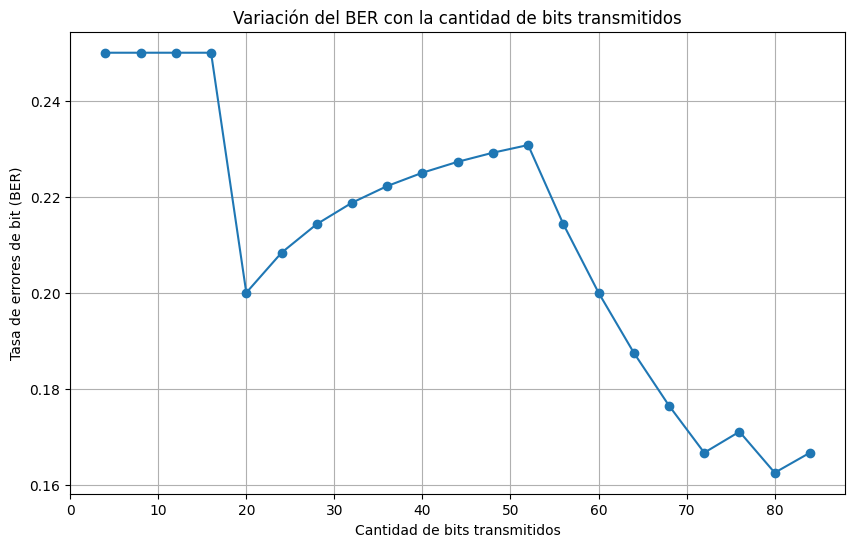

Datos guardados en datos_decodificados.xlsx


In [49]:
# Prueba de uso
bits_codificados = [0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]

mensaje_decodificado, ber_list, bits_transmitidos_list = procesar_codigo_hamming(bits_codificados)
print("Mensaje decodificado:", mensaje_decodificado)

# Convertir los bloques de 4 bits a valores decimales
datos_decodificados = convertir_a_decimal(mensaje_decodificado)

# Graficar el BER
graficar_ber(ber_list, bits_transmitidos_list)


tiempos = [i * 10 for i in range(len(datos_decodificados))]


guardar_datos_excel(tiempos, datos_decodificados)
columna_tiempo = df_original.iloc[:, 0].astype(int)
columna_bpm = df_original.iloc[:, 1].astype(int)


longitud_maxima = max(len(columna_tiempo), len(columna_bpm), len(ber_list))
ber_list.extend([None] * (longitud_maxima - len(ber_list)))


df_nuevo = pd.DataFrame({
    'Tiempo (s)': columna_tiempo,
    'Latidos por minuto (BPM)': columna_bpm,
    'BER': ber_list  
})

df_nuevo.to_excel("datos_decodificados.xlsx", index=False)

In [50]:
def split_into_chunks(array, chunk_size):
    # Use list comprehension to create chunks
    return [array[i:i + chunk_size] for i in range(0, len(array), chunk_size)]

def deco_hamming_15_11(codigo):
    
    # Funcion para calcular los bits de paridad
    def calcular_paridad(codigo, positions):
        parity = 0
        for pos in positions:
            parity ^= codigo[pos - 1]
        return parity

    # Posiciones de los bits de paridad
    parity_positions = [1, 2, 4, 8]

    # Posiciones cubiertas por cada bit de paridad
    parity_coverage = {
        1: [1, 3, 5, 7, 9, 11, 13, 15],
        2: [2, 3, 6, 7, 10, 11, 14, 15],
        4: [4, 5, 6, 7, 12, 13, 14, 15],
        8: [8, 9, 10, 11, 12, 13, 14, 15]
    }

    # Calculo del sindrome
    syndrome = 0
    for parity_pos in parity_positions:
        expected_parity = calcular_paridad(codigo, parity_coverage[parity_pos])
        actual_parity = codigo[parity_pos - 1]
        if expected_parity != actual_parity:
            syndrome += parity_pos

    # Corregir el error si el sindrome es diferente de 0
    if syndrome != 0:
        print(f"Error detectado en la posicion {syndrome}. Corrigiendo el error...")
        codigo[syndrome - 1] ^= 1

    # Extraer los bits de datos originales. (posiciones, no exponentes de 2)
    data_positions = [3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15]
    data_bits = [codigo[pos - 1] for pos in data_positions]

    return data_bits

# Prueba de uso
codigo_recibido = [0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1]
mensaje_corregido = []
#codigo_recibido = [1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1]  # Ejemplo de codigo con un error
if len(codigo_recibido) == 15:
    bits_datos_corregidos = deco_hamming_15_11(codigo_recibido)
    print("Bits de datos corregidos:", bits_datos_corregidos)
else:
    # Example usage
    chunk_t = 15
    chunks = split_into_chunks(codigo_recibido, chunk_t)

    for chunk in chunks:
        print("datos recibidos:",chunk)
        bits_datos_corregidos = deco_hamming_15_11(chunk)
        mensaje_corregido = mensaje_corregido + bits_datos_corregidos
        print("Bits de datos corregidos:", bits_datos_corregidos)

print("Mensaje original: ",mensaje_corregido)

datos recibidos: [0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1]
Error detectado en la posicion 10. Corrigiendo el error...
Bits de datos corregidos: [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]
datos recibidos: [1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1]
Error detectado en la posicion 11. Corrigiendo el error...
Bits de datos corregidos: [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1]
datos recibidos: [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0]
Error detectado en la posicion 8. Corrigiendo el error...
Bits de datos corregidos: [0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
datos recibidos: [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0]
Error detectado en la posicion 14. Corrigiendo el error...
Bits de datos corregidos: [1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0]
datos recibidos: [1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1]
Error detectado en la posicion 15. Corrigiendo el error...
Bits de datos corregidos: [1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0]
datos recibidos: [0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0]
Error detectado en la posici

In [ ]:
# Convertir los bloques de 4 bits a valores decimales
datos_decodificados = convertir_a_decimal(mensaje_corregido)

# Graficar el BER
graficar_ber(ber_list, bits_transmitidos_list)


tiempos = [i * 10 for i in range(len(datos_decodificados))]


guardar_datos_excel(tiempos, datos_decodificados)
columna_tiempo = df_original.iloc[:, 0].astype(int)
columna_bpm = df_original.iloc[:, 1].astype(int)


longitud_maxima = max(len(columna_tiempo), len(columna_bpm), len(ber_list))
ber_list.extend([None] * (longitud_maxima - len(ber_list)))


df_nuevo = pd.DataFrame({
    'Tiempo (s)': columna_tiempo,
    'Latidos por minuto (BPM)': columna_bpm,
    'BER': ber_list  
})

df_nuevo.to_excel("datos_decodificados.xlsx", index=False)